In [8]:
import argparse
import sys, os
from dataset.lazy_loader import LazyLoader
from dataset.probmeasure import UniformMeasure2D01
from dataset.toheatmap import CoordToGaussSkeleton, ToGaussHeatMap
from modules.nashhg import HG_skeleton
from parameters.path import Paths
from viz.image_with_mask import imgs_with_mask
sys.path.append(os.path.join(sys.path[0], '/home/ibespalov/unsupervised_pattern_segmentation/'))
sys.path.append(os.path.join(sys.path[0], '/home/ibespalov/unsupervised_pattern_segmentation/gans_pytorch/'))
sys.path.append(os.path.join(sys.path[0], '/home/ibespalov/unsupervised_pattern_segmentation/gans_pytorch/stylegan2'))
sys.path.append(os.path.join(sys.path[0], '/home/ibespalov/unsupervised_pattern_segmentation/gans_pytorch/gan/'))

from stylegan2.model import Generator
from gan.loss.stylegan import StyleGANLoss
from gan.models.stylegan import CondStyleGanModel
from gan.nn.stylegan.discriminator import ConditionalDiscriminator
from gan.nn.stylegan.generator import CondGen7, ConditionalDecoder
from gan.nn.stylegan.style_encoder import StyleEncoder
import torch
from torch import nn, optim

from dataset.probmeasure import UniformMeasure2DFactory, \
    UniformMeasure2D01

import matplotlib.pyplot as plt

In [9]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)
torch.cuda.set_device(device)

encoder_HG = HG_skeleton(CoordToGaussSkeleton(256, 4))

print("HG")

latent = 512
n_mlp = 5
size = 256

generator = CondGen7(Generator(
    size, latent, n_mlp, channel_multiplier=1
), heatmap_channels=1, cond_mult=1.0)

discriminator = ConditionalDiscriminator(
    size, channel_multiplier=1, heatmap_channels=1, cond_mult=1.0
)


starting_model_number = 440000
weights = torch.load(
    f'{Paths.default.models()}/stylegan2_new_{str(starting_model_number).zfill(6)}.pt',
    # f'{Paths.default.nn()}/stylegan2_w300_{str(starting_model_number).zfill(6)}.pt',
    map_location="cpu"
)

generator.load_state_dict(weights['g'])
encoder_HG.load_state_dict(weights['e'])


generator = generator.cuda()
generator.eval()
encoder_HG = encoder_HG.cuda()
generator.eval()
encoder_HG.eval()

cuda:2
HG


HG_skeleton(
  (model): HourglassNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (layer1): Sequential(
      (0): Bottleneck(
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (relu): LeakyReLU(negative_slope=0.2, inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
    )
 

In [10]:
test_img = next(LazyLoader.celeba().loader).cuda()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


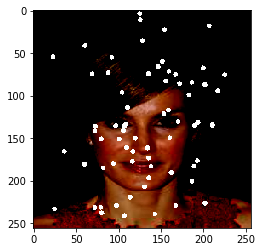

In [11]:
with torch.no_grad():

    encoded_test = encoder_HG(test_img)
    pred_measures_test: UniformMeasure2D01 = UniformMeasure2D01(encoded_test["coords"])
    heatmaper_256 = ToGaussHeatMap(256, 1.0)
    sparse_hm_test_1 = heatmaper_256.forward(pred_measures_test.coord)

    sparce_mask = sparse_hm_test_1.sum(dim=1, keepdim=True)
    sparce_mask[sparce_mask < 0.0003] = 0
    iwm = imgs_with_mask(test_img, sparce_mask)

    plt.imshow(iwm[0].cpu().permute(1,2,0).numpy())
    plt.show()


In [12]:
# plt.imshow((img[0].permute(1,2,0).cpu().numpy()+1)/2)
# plt.scatter(coords[0,:,1].cpu().numpy()*255, coords[0,:,0].cpu().numpy()*255)
# plt.show()
#

In [13]:
# plt.imshow((img['data'][0].permute(1,2,0).cpu().numpy()+1)/2)
# plt.scatter(coords[0,:,1].cpu().numpy()*255, coords[0,:,0].cpu().numpy()*255)
# plt.show()

In [14]:
# plt.imshow((img['data'][0].permute(1,2,0).cpu().numpy()+1)/2)
# plt.scatter(coords[0,:,1].cpu().numpy()*255, coords[0,:,0].cpu().numpy()*255)
# plt.show()

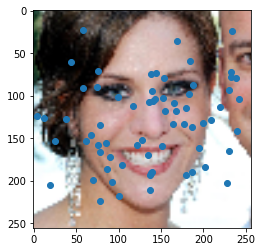

In [11]:
plt.imshow((img['data'][0].permute(1,2,0).cpu().numpy()+1)/2)
plt.scatter(coords[0,:,1].cpu().numpy()*255, coords[0,:,0].cpu().numpy()*255)
plt.show()